# [Reproducible Data Analysis in Jupyter](http://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/)
[YouTube Playlist](https://www.youtube.com/playlist?list=PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ)

## From exploratory analysis to reproducible science

In [1]:
#from here: https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k/data
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x7fbc0c0906d8>)

In [3]:
!head Fremont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,9,4
10/03/2012 01:00:00 AM,6,4
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,3,2
10/03/2012 04:00:00 AM,1,6
10/03/2012 05:00:00 AM,10,21
10/03/2012 06:00:00 AM,50,105
10/03/2012 07:00:00 AM,95,257
10/03/2012 08:00:00 AM,146,291


In [4]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
#make parse string of Date and make it an index
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


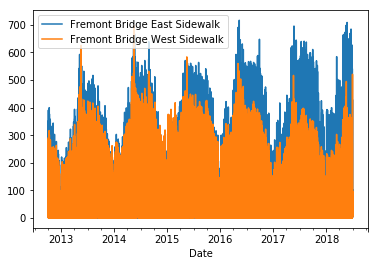

In [5]:
%matplotlib inline
data.plot() #hourly counts on the course of 4 year, too much

## Resampling/GroupBy freq

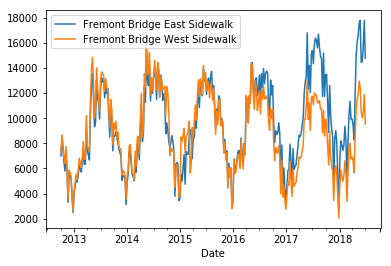

In [6]:
data.resample("W").sum().plot(); #do groupby by week and sum()
#more info about resampling here: http://benalexkeen.com/resampling-time-series-data-with-pandas/

## seaborn style

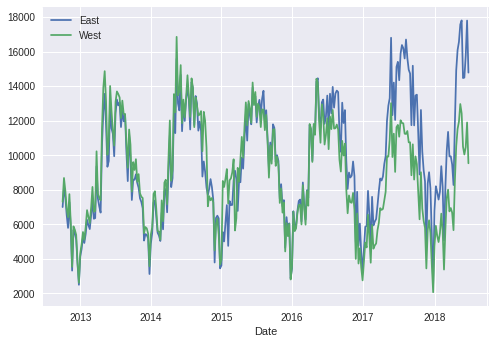

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

data.columns = ['East', 'West']

data.resample("W").sum().plot(); #do groupby by week and sum()

## Detect trends using Rolling window (Moving Average)

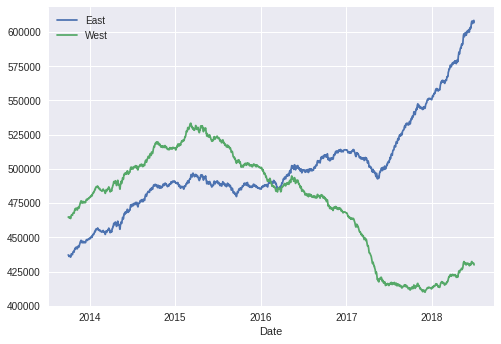

In [8]:
data.resample("D").sum().rolling(365).sum().plot(); #group by day and sum(), then add a 365 sum moving window
#This is the anual trend

(0, 1071703.9)

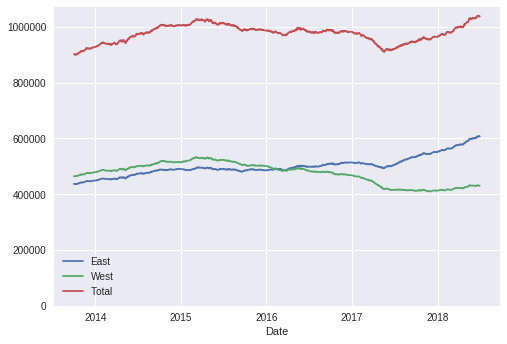

In [9]:
data['Total'] = data['West'] + data['East']

ax = data.resample("D").sum().rolling(365).sum().plot(); #group by day and sum(), then add a 365 sum moving window
#This is the anual trend

ax.set_ylim(0, None) #None is the current maximum

## Detect trends using Group by (time of day)

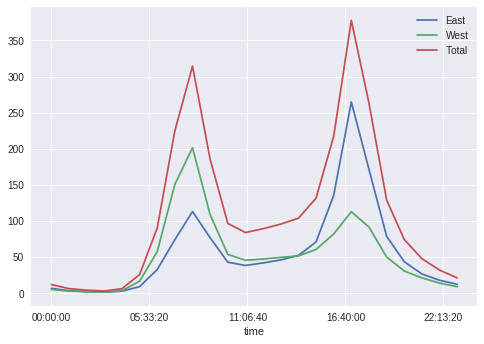

In [10]:
data.groupby(data.index.time).mean().plot();
#People are going in from the West, and out of the city from the East (less people are doing so - East in to West out)

## Pivot table: 
### See actual in-day activity (Expanding the group by)
[Pandas: group by and Pivot table difference](https://stackoverflow.com/a/34702851/1640414)
* Using groupby() puts the data in groups by key where **the values are in the rows**
* Using pivot_table() the data are grouped by the key and **the values are on the columns!**

In [11]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date) #rows by time column by date
pivoted.iloc[:5, :5] #take a snapshot

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


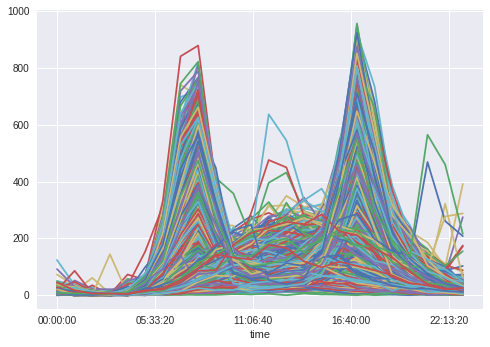

In [12]:
pivoted.plot(legend=False)

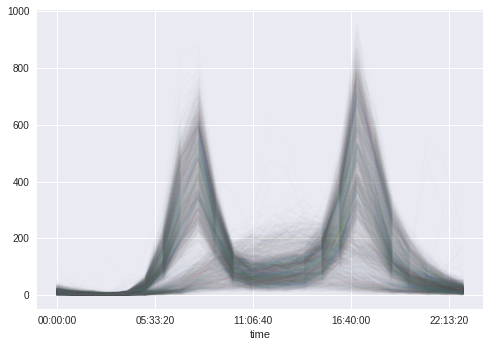

In [13]:
pivoted.plot(legend=False, alpha = 0.01)

**Because we've used alpha we can see 2 clusters of activity**, one is weekdays (working days) and the other one is non-working (days)